In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [ ]:

car_df=pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
car_df.shape

(398, 9)

### here in the above columns most potential column that we need to predict is mpg(mileage)



## verifying the correlation of the variables above

In [ ]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Observation:
### Here the variable horsepower is not there though the horsepower variable is continious but still the describe is not showing values need to check whats wrong

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Observation:
### As you can see above the hp value are not integer values they are objects so need to check the values

In [ ]:
car_df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

## Observation: In the horsepower values ? mark is included whichmakes the variable as object
### need to replace the values and convert horsepower variable to integer

In [ ]:
car_df['horsepower']=car_df['horsepower'].replace('?',np.nan)

In [ ]:
# here the ? mark vales are replaced with the nan values so will check how many records got replaced
car_df['horsepower'].isnull().sum()

6

#### 6 values got replaced as nan in horsepower variable

### now need to convert the horsepower variable to interger and fill the nan values with median value of horsepower

In [ ]:
car_df['horsepower']=car_df['horsepower'].astype('float64')

In [ ]:
car_df['horsepower'].dtype

dtype('float64')

In [ ]:
# fill the nan values with median values
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())

In [ ]:
car_df['horsepower'].isnull().sum()

0

### so now the hp variable got converted to integers and now we can proceed to check the correlation of the variables

In [ ]:
corr_table=car_df.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


## Lets visualize the above values in the heat map

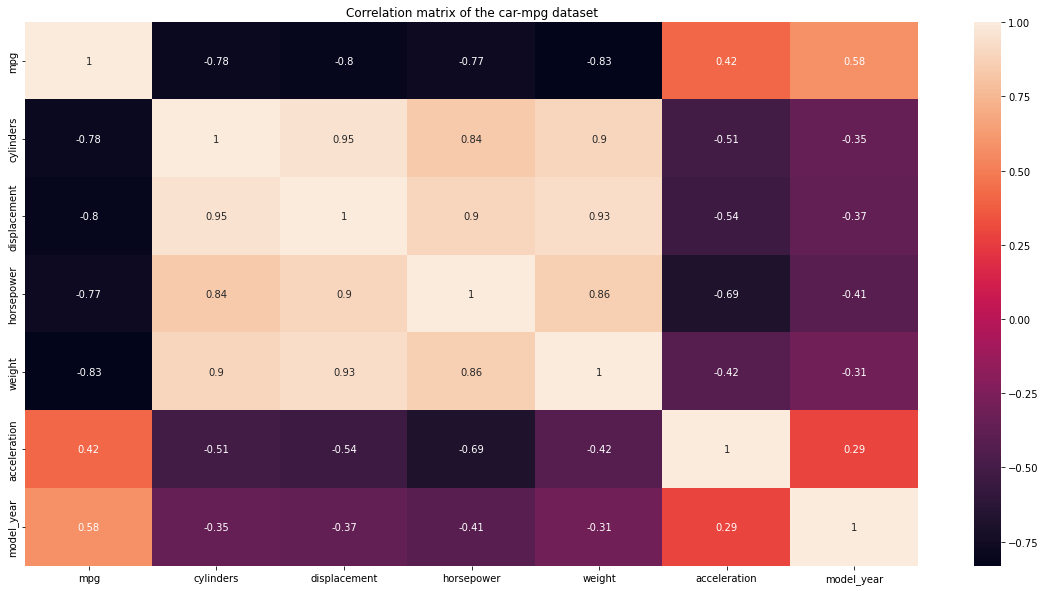

In [ ]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show()          
           

## Inferences:
 
 ### Mpg column is having good corelation on cyl,disp,wt
 
 ### cyl ,disp and wt  and hp are having negative corelation 
 
 ### next will check the data distribution using the pair plot

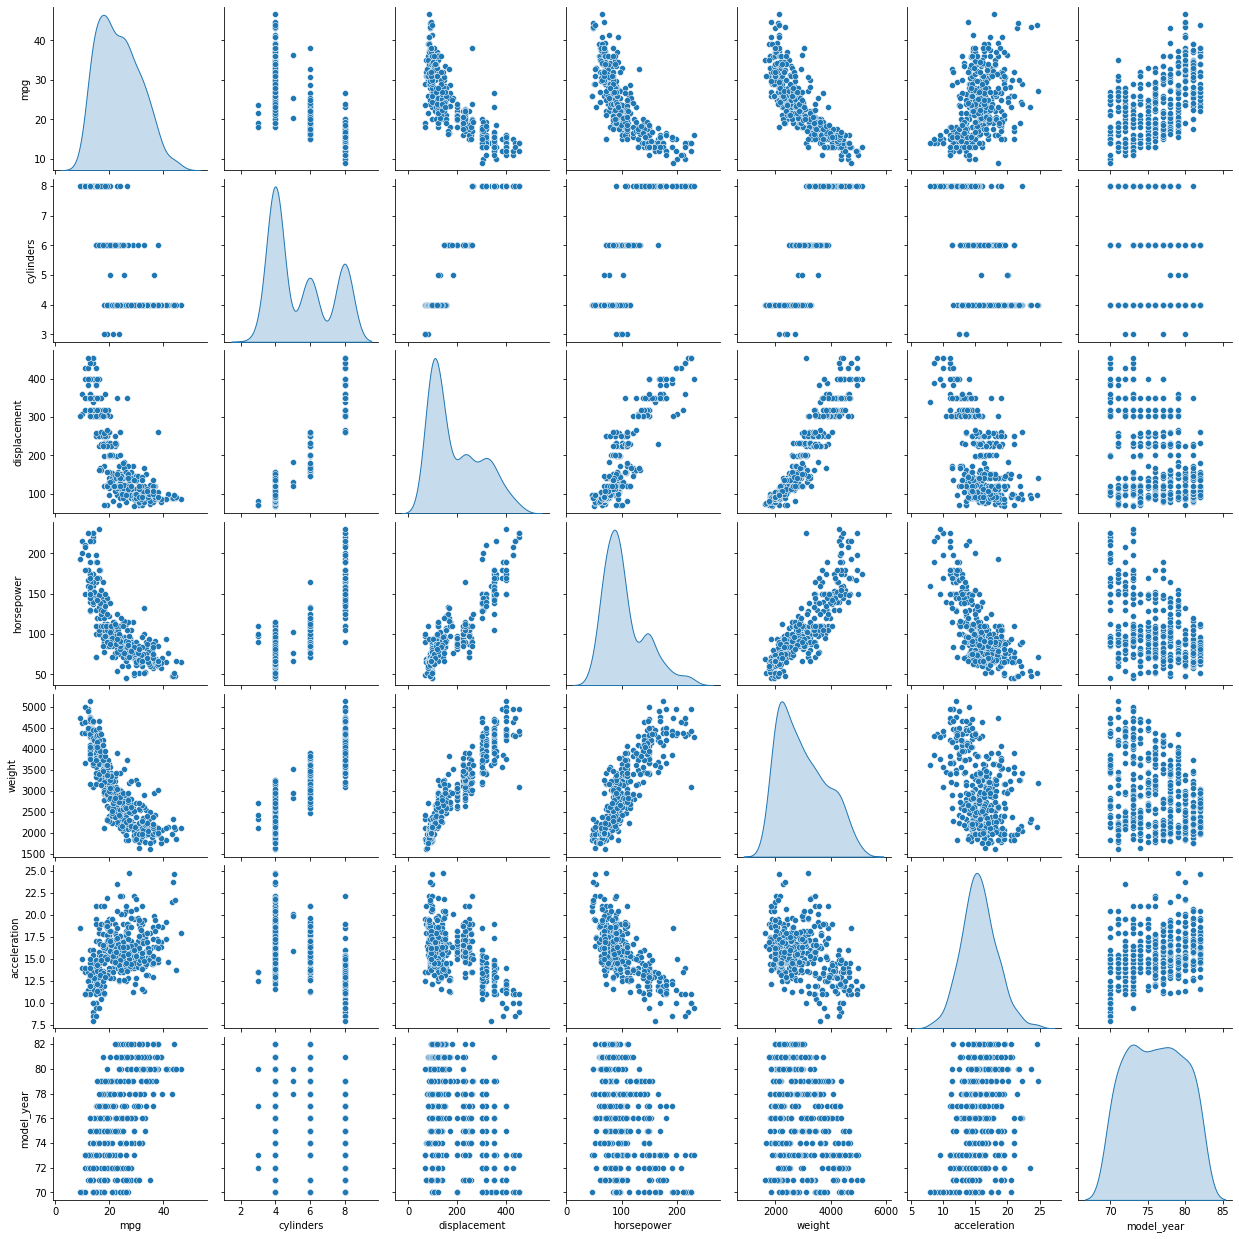

In [ ]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

In [ ]:
car_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

# Next will be performing the statistical test to find the significance of variable so that we can reduce no.of variable 

In [ ]:
# for this we need to import statsmodels as shown below 
import statsmodels.formula.api as smf

In [ ]:
test1=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',car_df).fit()

In [ ]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     142.0
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          4.06e-103
Time:                        16:15:50   Log-Likelihood:                -1130.6
No. Observations:                 398   AIC:                             2277.
Df Residuals:                     390   BIC:                             2309.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.8196      2.667     17.181      0.000      40.576      51.063
origin[T.japan]     1.5162      0.697      2.174      0.030       0.145       2.888
origin[T.usa]      -1.3918      0.696     -2.001      0.046      -2.760      -0.024
cylinders          -0.5322      0.404     -1.318      0.188      -1.326       0.262
displacement        0.0111      0.010      1.153      0.249      -0.008       0.030
horsepower         -0.0562      0.017     -3.392      0.001      -0.089      -0.024
weight             -0.0050      0.001     -6.285      0.000      -0.007      -0.003
acceleration       -0.0115      0.121     -0.095      0.925      -0.250       0.227
==============================================================================
Omnibus:                       32.850   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.682
Skew:                           0.626   Prob(JB):                     3.27e-10
Kurtosis:                       4.033   Cond. No.                     3.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Inference as in the above summary the p value of the acc is greater than 0.05 so we can remove the acc variable from the dataset

In [ ]:
car_df=car_df.drop('acceleration',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model_year,origin,name
0,18.0,8,307.0,130.0,3504,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,70,usa,ford torino


In [ ]:
# i am removing the car name variable as i has nothing to to here
car_df=car_df.drop('name',axis=1)
car_df=car_df.drop('origin',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model_year
0,18.0,8,307.0,130.0,3504,70
1,15.0,8,350.0,165.0,3693,70
2,18.0,8,318.0,150.0,3436,70
3,16.0,8,304.0,150.0,3433,70
4,17.0,8,302.0,140.0,3449,70


## Now we are good enough to train our regression model

In [ ]:
# importing the requried libaries for regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics


## now i am spliting my dataframe into dependent and independent variable i.e x and y

In [ ]:
y=car_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
x=car_df.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,model_year
0,8,307.0,130.0,3504,70
1,8,350.0,165.0,3693,70
2,8,318.0,150.0,3436,70
3,8,304.0,150.0,3433,70
4,8,302.0,140.0,3449,70


## I am using here KFold method to train and test my model to get good metrices and performance

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
for train,test in kf.split(x,y):
    LR=LinearRegression()
    #print(train)
    xtrain=x.iloc[train]
    xtest=x.iloc[test]
    ytrain=y.iloc[train]
    ytest=y.iloc[test]
    LR.fit(xtrain,ytrain)
    ypredict=LR.predict(xtest)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(ytest,ypredict)))
    
    #r_value=LR.score(ytest,ypredict)
print('Rmse error in the first test is :%1.3f'%(rmse[0]))
print('Rmse error in the second test is:%1.3f'%(rmse[1]))
print('Rmse error in the third test is :%1.3f'%(rmse[2]))
print('Rmse error in the fourth test is:%1.3f'%(rmse[3]))
print('Rmse error in the fifth test is :%1.3f'%(rmse[4]))

print('Average mean rmse error i.e Bias error is: %1.3f'%(np.mean(rmse)))

print('Variance of rmse error i.e Variance error is: %1.3f'%(np.var(rmse,ddof=1)))

#print('R2 value of the model is : %1.3f'%(r_value))
    
    
    

Rmse error in the first test is :2.986
Rmse error in the second test is:3.716
Rmse error in the third test is :3.727
Rmse error in the fourth test is:3.499
Rmse error in the fifth test is :3.428
Average mean rmse error i.e Bias error is: 3.471
Variance of rmse error i.e Variance error is: 0.091


In [ ]:
## predicting the mileage values for new values 
# cylinder=8,displacement=206,horsepower=200,weight=1900,modelyear=70,origin=2
values=[[8,206,200,1900,70]]
new_mileage=LR.predict(values)
print('predicted new mileage for above values is %1.3f'%new_mileage)

predicted new mileage for above values is 25.466


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
